# Dimension Reduction and PCA

### Import Iris Data Set...

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame

#this data has 4 dimensions (4 variables)
# loading dataset into Pandas DataFrame
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','type'])
df.head(15) #head allows you to choose how many rows you want printed () empty default is 5


,sepal length,sepal width,petal length,petal width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Standardize Data

In [2]:
import numpy as np
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values #df.loc accesses a group of rows or columns
# Separating out the target
y = df.loc[:,['type']].values

# Standardizing the features by subtracting the mean
mean_vec = np.mean(x, axis=0) #creating vector of means
x1 = x - mean_vec #subtracting the means and normalizing

pd.DataFrame(data = x1, columns = features).head(15)

,sepal length,sepal width,petal length,petal width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667
5,-0.443333,0.846,-2.058667,-0.798667
6,-1.243333,0.346,-2.358667,-0.898667
7,-0.843333,0.346,-2.258667,-0.998667
8,-1.443333,-0.154,-2.358667,-0.998667
9,-0.943333,0.046,-2.258667,-1.098667


### Find Covariance Matrix

In [3]:
A = np.cov(x.T)
print(A)
A.shape

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


(4, 4)

### Find Eigenvalues and Eigenvectors

In [4]:
e, v = np.linalg.eig(A) #command finds the eigenvalues and vectors associated, stores them separately into e and then v
print (e)
print (v)

[4.22484077 0.24224357 0.07852391 0.02368303]
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


### Sort Eigenvalues/vectors Largest to Smallest

In [5]:
idx = np.argsort(e)[::-1]
e = e[idx] #orders eigen values based on index of largest to smallest eigenvalues
e = np.real_if_close(e) #adjusts eigenvalues to be real numbers
v = v[:, idx]#adjusts the eigenvectors to correspond to eigenvalues
print(idx)

[0 1 2 3]


### Determine Amount of Variance and Select Principle Components

In [6]:
expvar = e/e.sum() #will give the percent of variance covered by each eigenvalue/vector
print(expvar) 

[0.92461621 0.05301557 0.01718514 0.00518309]


### Selecting PCs

In [7]:
cutoff = 0.05
cutind = np.where(expvar > cutoff)
e = e[cutind]
print(e)
v = v[cutind]
print(v)
v.shape

[4.22484077 0.24224357]
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]]


(2, 4)

### Dimension Reduction and Change of Basis for PCA
In this section we will perform matrix multiplication of the standardized data and the vectors of the principal components to get a new data matrix that will have n rows and m columns (where n= # of observations, and m= # of PCs)

In [8]:
PCdata = x.dot(v.T)
PCdata.shape
principalDf = pd.DataFrame(data = PCdata
             , columns = ['PC 1', 'PC 2'])
finalDf = pd.concat([principalDf, df[['type']]], axis = 1) #axis=1 refers to columns not rows

finalDf.head(15)

,PC 1,PC 2,type
0,-1.203728,-2.203398,Iris-setosa
1,-0.947776,-1.822088,Iris-setosa
2,-1.093302,-2.011219,Iris-setosa
3,-1.180006,-1.810737,Iris-setosa
4,-1.305540,-2.268143,Iris-setosa
5,-1.468715,-2.405857,Iris-setosa
6,-1.287143,-2.121702,Iris-setosa
7,-1.232332,-2.062558,Iris-setosa
8,-1.062916,-1.707983,Iris-setosa
9,-1.103255,-1.803008,Iris-setosa


### Plot Data in Reduced Dimensions

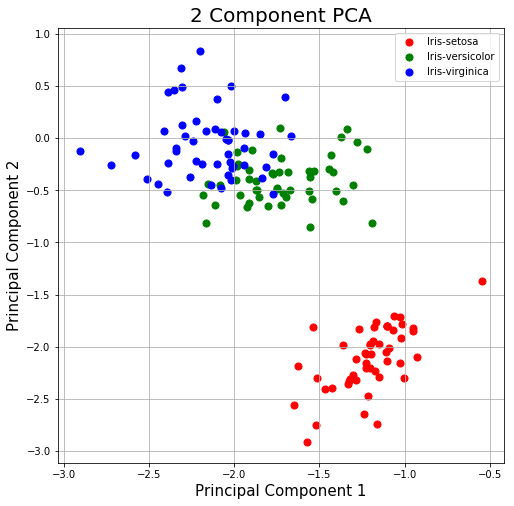

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Compare to Probablistic PCA package

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x2 = StandardScaler().fit_transform(x) #subtracts the mean
pd.DataFrame(data = x2, columns = features).head(15)

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


In [11]:
pca = PCA(n_components=2) #choosing 2 principal components and assigning them to the variable "pca"
principalComponents = pca.fit_transform(x2) #gives you 2D data, with 2 principle components

principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])

finalDf1 = pd.concat([principalDf1, df[['type']]], axis = 1)

principalDf1.head(15)

,PC 1,PC 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
5,-2.070537,1.518549
6,-2.445711,0.074563
7,-2.233842,0.247614
8,-2.341958,-1.095146
9,-2.188676,-0.448629


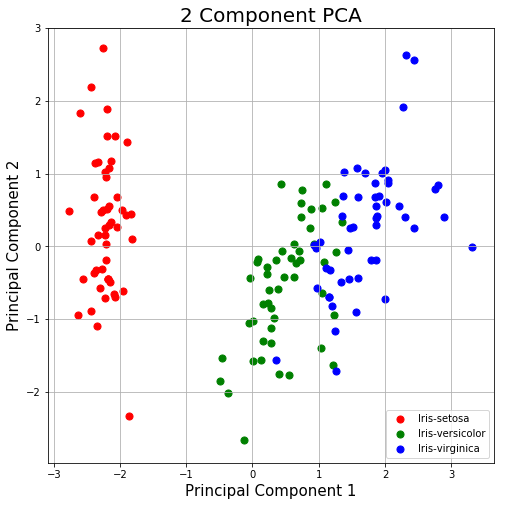

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf1['type'] == target
    ax.scatter(finalDf1.loc[indicesToKeep, 'PC 1']
               , finalDf1.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()